Task 1 and 2 -- Deep learning Assignment1


*   Ashwin Raghavan
*   Prashant Bhargava



In [8]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np

In [9]:
# Display plots inline
%matplotlib inline

## Dataset 1 - Blobs 3D

In [10]:
# Use pandas to read the CSV file as a dataframe
df1 = pd.read_csv("blobs600.csv")

# The y values are those labelled 'Class': extract their values
y1 = df1['Class'].values

# The x values are all other columns
del df1['Class']   # drop the 'Class' column from the dataframe
X1 = df1.values     # convert the remaining columns to a numpy array

In [11]:
# Check its dimensions

print(f"The dimensions of the dataset are: {np.shape(X1)}")

The dimensions of the dataset are: (600, 3)


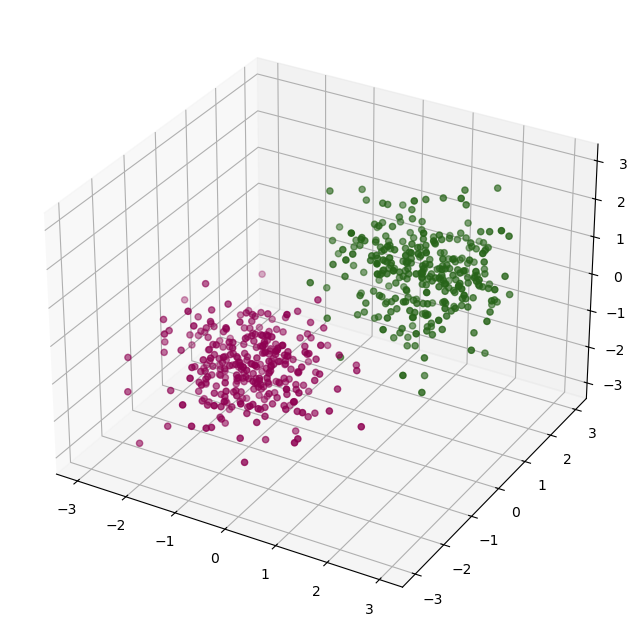

In [12]:
# Plot the dataset in 3D, with colours according to the class label

fig = plt.figure(figsize=(8, 8)) # set the size to 8x8
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X1[:,0], X1[:,1], X1[:,2], c=y1, cmap="PiYG") # changed the colour map because why not

plt.show()
plt.close(fig)

## Dataset 2 - Circles 2D

In [13]:
# Use pandas to read the CSV file as a dataframe
df2 = pd.read_csv("circles500.csv")

# The y values are those labelled 'Class': extract their values
y2 = df2['Class'].values

# The x values are all other columns
del df2['Class']   # drop the 'Class' column from the dataframe
X2 = df2.values     # convert the remaining columns to a numpy array

In [14]:
# Check its dimensions

print(f"The dimensions of Dataset 2 are: {np.shape(X2)}")

The dimensions of Dataset 2 are: (500, 2)


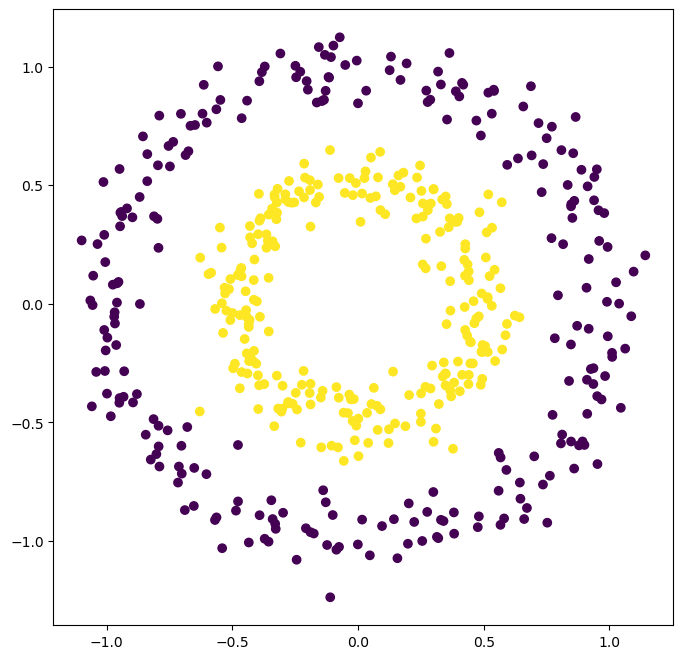

In [15]:
# plot X[0] vs X[1] and colour points according to the class, y

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(X2[:,0], X2[:,1], c=y2)

plt.show()
plt.close(fig)

## Examine Data

In [16]:
# Some examples of working with the data, to look at rows/columns
print ("len(X2):", len(X2))            # outer array: one per sample
print ("len(X2[0]):", len(X2[0]))      # each inner array is the attributes of one sample
print ("len(X2[:,0]):", len(X2[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X2)
print ("X2: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y2)", len(y2))
print ("np.shape(y2):", np.shape(y2))

# You can transpose the y data using 'reshape'
yt = np.reshape(y2, (len(y2),1))
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y2 transpose: nsamples =", nsamples, ", nattribs =", nattribs)

len(X2): 500
len(X2[0]): 2
len(X2[:,0]): 500
X2: nsamples = 500 , nattribs = 2
len(y2) 500
np.shape(y2): (500,)
np.shape(yt): (500, 1)
y2 transpose: nsamples = 500 , nattribs = 1


In [17]:
X_train = pd.DataFrame(X2)
y_train = pd.Series(y2)
idx = np.random.randint(0, 50)
X_train.iloc[7]

0    0.750316
1    0.698184
Name: 7, dtype: float64

In [18]:
class LogisticRegression:
  def __init__(self,alpha, max_iterations, threshold, N):
    self.alpha = alpha
    self.max_iterations = max_iterations
    self.threshold = threshold
    self.weights = None
    self.bias = None
    self.N = N

  def sigmoid(self,z):
    return 1 / (1 + np.exp(-z))

  def lossFunction(self, y_i, y_hat):
    return -(y_i * np.log(y_hat) + (1-y_i) * (np.log(1-y_hat)))


  def gradientDecent(self,X_train,y_train):
    j_running = 0
    j_previous = 0
    stopping = False
    iterations = 0
    while not stopping:
      idx = np.random.randint(0, X_train.shape[0])
      x_i = X_train.iloc[idx]
      y_i = y_train.iloc[idx]
      # Forward propagation stage
      # Calculate z
      z = np.dot(x_i, self.weights) + self.bias # source: https://stackoverflow.com/questions/5919530/what-is-the-pythonic-way-to-calculate-dot-product

      # Calculate y_hat by applying sigmoid
      y_hat = self.sigmoid(z)
      y_hat = np.clip(y_hat, 1e-15, 1 - 1e-15)
      j_current = self.lossFunction(y_i,y_hat)
      #Calculate partial derivates.
      # From the lecture we have to get the error that is, y_hat(i) - y(i)
      # After this we will calculate the partial derivatives as :
      # Delta w_j = (y_hat(i) - y(i)) * x_j(i)
      # Delta b   = (y_hat(i) - y(i))
      error = y_hat - y_i
      delta_w = error * x_i # gives us vector of delta weight one for each feature
      delta_b = error # Scalar value

      # Loop again over the j elements of w:
      # w_j -= alpha * delta_w
      # b   -= alpha * delta_b
      #print(error,weights, delta_w)
      self.weights -= self.alpha * delta_w
      self.bias -= self.alpha * delta_b

      # Check stopping criteria
      iterations += 1
      j_running += j_current

      if iterations > self.max_iterations:
          stopping = True # Failed to converge
          print(f"Stopped: Reached max iterations ({iterations})")

      if (iterations % self.N) == 0: # Have done N iterations: test for convergence on the batch
          # Compare J_running with J_running_prev: if less than threshold, stopping = True
          if (j_running - j_previous) < self.threshold:
              stopping = True
              print(f"Stopped: Converged at iteration {iterations}. Cost diff: {j_running - j_previous}")

          # Set J_running_prev = J_running; J_running = 0
          j_previous = j_running
          j_running = 0

    return self.weights, self.bias

  def fit(self, X_train, y_train):
    n_features = X_train.shape[1]
    self.weights = np.random.normal(0,0.01,n_features)
    #print(self.weights)
    self.bias = np.random.normal(0,0.01)
    self.weights, self.bias = self.gradientDecent(X_train, y_train)
    #print(self.weights)


  def predict(self, X):
    #print(self.weights)
    z = np.dot(X, self.weights) + self.bias
    y_predicted = self.sigmoid(z)
    #print(y_predicted)
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
    return np.array(y_predicted_cls)

  def score(self,y_pred, y_true):
    return int(np.mean(y_pred == y_true) * 100)


In [19]:
model = LogisticRegression(0.005, 5000, 0.0001,100)

Dataset1

In [34]:
X = pd.DataFrame(X1)
y = pd.Series(y1)
n = X.shape[0]
train_length = int(n*.70)
test_length = int(n*.15)
X_train1 = X[:train_length]
X_test1 = X[train_length:train_length+test_length]
X_val1 = X[train_length+test_length:]
y_train1 = y[:train_length]
y_test1 = y[train_length:train_length+test_length]
y_val1 = y[train_length+test_length:]
print("Total data length :",X.shape[0] )
print("Train Length :",X_train1.shape[0])
print("Test Length :",X_test1.shape[0])
print("Val Length :",X_val1.shape[0])


Total data length : 600
Train Length : 420
Test Length : 90
Val Length : 90


In [35]:
model.fit(X_train1,y_train1)

Stopped: Converged at iteration 200. Cost diff: -18.67199110318002


In [36]:
y_val_pred1 = model.predict(X_val1)

In [37]:
score = model.score(y_val_pred1,y_val1)
print(f"Accuracy: {score}%")


Accuracy: 100%


In [38]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_val_pred1, y_val1)
cnf_matrix

array([[42,  0],
       [ 0, 48]])

In [41]:
y_test_pred1 = model.predict(X_test1)

In [42]:
score = model.score(y_test_pred1,y_test1)
print(f"Accuracy: {score}%")


Accuracy: 97%


In [81]:
df1 = X_test1.copy()
df1['y_pred'] = y_test_pred1

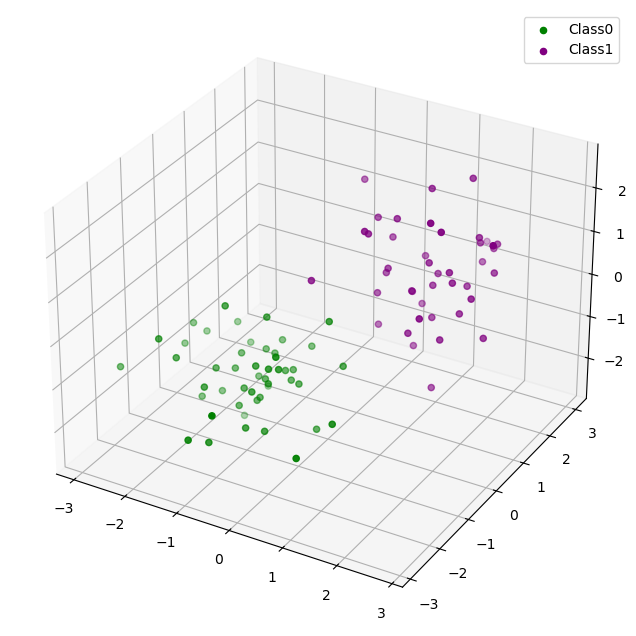

In [85]:
fig = plt.figure(figsize=(8, 8)) # set the size to 8x8
ax = fig.add_subplot(111, projection="3d")
df1_0 = df1[df1["y_pred"] == 0]
df1_1 = df1[df1["y_pred"] == 1]
ax.scatter(df1_0.iloc[:,0], df1_0.iloc[:,1], df1_0.iloc[:,2], color='green', label='Class0') # changed the colour map because why not
ax.scatter(df1_1.iloc[:,0], df1_1.iloc[:,1], df1_1.iloc[:,2], color='purple', label='Class1') # changed the colour map because why not
ax.legend()
plt.show()
plt.close(fig)

Dataset 2

In [44]:
X = pd.DataFrame(X2)
y = pd.Series(y2)
n = X.shape[0]
train_length = int(n*.70)
test_length = int(n*.15)
X_train2 = X[:train_length]
X_test2 = X[train_length:train_length+test_length]
X_val2 = X[train_length+test_length:]
y_train2 = y[:train_length]
y_test2 = y[train_length:train_length+test_length]
y_val2 = y[train_length+test_length:]
print("Total data length :",X.shape[0] )
print("Train Length :",X_train2.shape[0])
print("Test Length :",X_test2.shape[0])
print("Val Length :",X_val2.shape[0])


Total data length : 500
Train Length : 350
Test Length : 75
Val Length : 75


In [61]:
model = LogisticRegression(0.1, 5000, 0.0001,1000)

In [62]:
model.fit(X_train2,y_train2)

Stopped: Converged at iteration 4000. Cost diff: -1.9953208926648358


In [63]:
y_val_pred2 = model.predict(X_val2)
score = model.score(y_val_pred2,y_val2)
print(f"Accuracy: {score}%")

Accuracy: 58%


In [64]:
y_test_pred2 = model.predict(X_test2)
score = model.score(y_test_pred2,y_test2)
print(f"Accuracy: {score}%")

Accuracy: 42%


In [78]:
df2 = X_test2.copy()
df2["y_pred"] = y_test_pred2

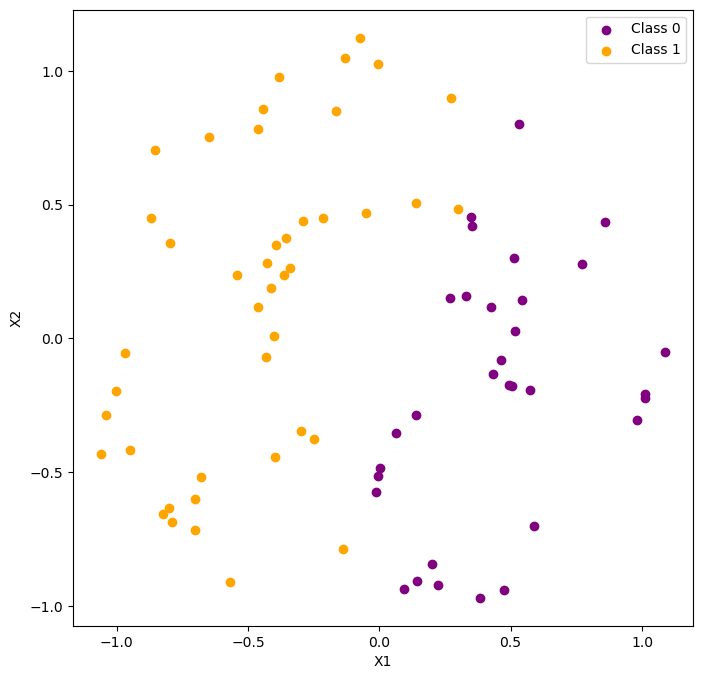

In [82]:
# plot X[0] vs X[1] and colour points according to the class, y

fig, ax = plt.subplots(figsize=(8, 8))

df2_0 = df2[df2["y_pred"] == 0]
df2_1 = df2[df2["y_pred"] == 1]

ax.scatter(df2_0.iloc[:, 0], df2_0.iloc[:, 1],
           color="purple", label="Class 0")

ax.scatter(df2_1.iloc[:, 0], df2_1.iloc[:, 1],
           color="orange", label="Class 1")

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.legend()

plt.show()
plt.close(fig)